In [6]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import random
import matplotlib.pyplot as plt
from matplotlib import pyplot

dataX = pd.read_fwf('uWaveGestureLibrary_X_TRAIN_tx.txt',header=None)
dataY = pd.read_fwf('uWaveGestureLibrary_Y_TRAIN_tx.txt',header=None)
dataZ = pd.read_fwf('uWaveGestureLibrary_Z_TRAIN_tx.txt',header=None)

df = pd.DataFrame(columns = ['time series id','time index','X','Y','Z','class'] ) 
newdf=df

for i in range(0,len(dataX)):
    newdf['X']=dataX.iloc[i,1:]
    newdf['Y']=dataY.iloc[i,1:]
    newdf['Z']=dataZ.iloc[i,1:]
    newdf['time index'] = range(1,316)
    newdf['time series id'] = i+1
    newdf['class'] = dataX.iloc[i,0]
    df=pd.concat([df, newdf], axis=0, sort=False)

df=df.iloc[315:,:]
df

,time series id,time index,X,Y,Z,class
1,1,1,-0.304243,-2.119396,-1.528965,6.0
2,1,2,-0.304243,-2.119396,-1.528965,6.0
3,1,3,-0.304243,-2.119396,-1.528965,6.0
4,1,4,-0.304243,-2.119396,-1.528965,6.0
5,1,5,-0.304243,-2.119396,-1.528965,6.0
...,...,...,...,...,...,...
311,896,311,1.968575,-0.886777,-0.848602,5.0
312,896,312,2.028532,-0.820651,-0.828104,5.0
313,896,313,1.987267,-0.754525,-0.800426,5.0
314,896,314,1.887578,-0.688399,-0.768603,5.0


I created a new data matrix (df) for which each row represent an observation from
a time series at a particular time index. This is basically concatenation of observations from
each axis based on time index and the time series id. And the last column is the class.

In [8]:
features = ['X', 'Y', 'Z']
x = df.loc[:, features].values
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1'])
explained_variance = pca.explained_variance_ratio_
print(principalDf)
explained_variance

        principal component 1
0                   -2.492575
1                   -2.492575
2                   -2.492575
3                   -2.492575
4                   -2.492575
...                       ...
282235              -0.262244
282236              -0.177775
282237              -0.132596
282238              -0.110094
282239              -0.087592

[282240 rows x 1 columns]


array([0.49059498])

I applied PCA to the whole data (regardless of the timeseries id, time index and class) and I reported PCA results.

In [10]:
finalDf=principalDf.join(df['time series id'].reset_index())
del finalDf['index']
finalDf=finalDf.join(df['class'].reset_index())
del finalDf['index']
finalDf

,principal component 1,time series id,class
0,-2.492575,1,6.0
1,-2.492575,1,6.0
2,-2.492575,1,6.0
3,-2.492575,1,6.0
4,-2.492575,1,6.0
...,...,...,...
282235,-0.262244,896,5.0
282236,-0.177775,896,5.0
282237,-0.132596,896,5.0
282238,-0.110094,896,5.0


Then, I added time series id and class informations to the data containing PCA results.

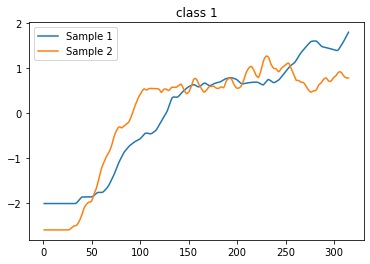

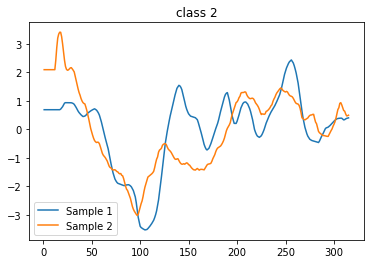

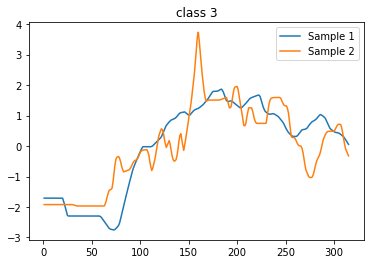

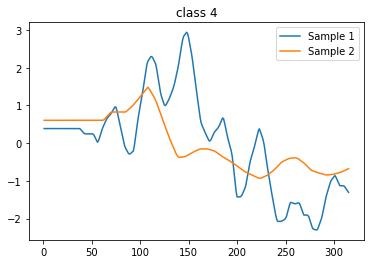

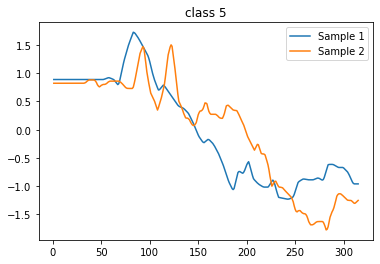

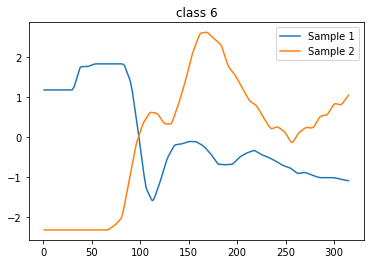

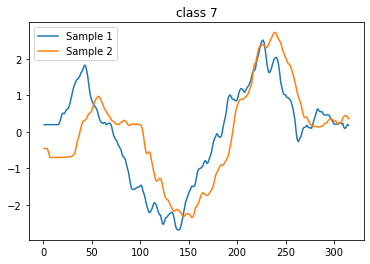

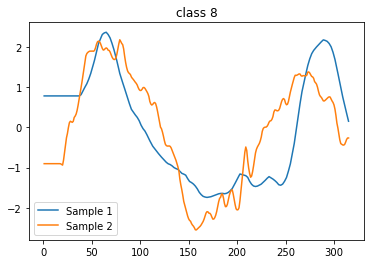

In [12]:
##plot pca values
for i in range(1,9):
    same_class_observations=finalDf.loc[finalDf.iloc[:,2]==i]
    samples=same_class_observations['time series id'].sample(n=2).to_frame()
    rslt_df1 = finalDf[finalDf['time series id'] == samples.iloc[0,0]]
    rslt_df2 = finalDf[finalDf['time series id'] == samples.iloc[1,0]]

    plt.plot(newdf['time index'], rslt_df1.iloc[:,0])
    plt.plot(newdf['time index'], rslt_df2.iloc[:,0])
    plt.legend(["Sample 1", "Sample 2"])
    plt.title('class %s' %i)
    plt.show()

For this part, I again filtered the data for each class and I selected 2 random time series from this filtered data. Then, I plotted the reduced dimensions as time series in a single plot. The same procedure is applied for each classes. By analyzing these plots we can firstly say that class 1 can be separated in the reduced dimensions since its reduced dimension plot has a significant increasing shape. On the other hand, we cannot say the same thing for class 6 for example because the reduced dimensions of observations do not show the same trend. Also, class 5 can be separated by using the same logic. Since plots for class 7 and 8 look like each other we can say that it may be hard to differentiate them. Therefore, ploting the reduced dimensions as time series may or may not be useful to see if classes can be separated in the reduced dimensions.